In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 4)
        #self.fc4 = nn.Linear(4, 4)
        self.fc5 = nn.Linear(4, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.log_softmax(x)
        #return F.softmax(x)

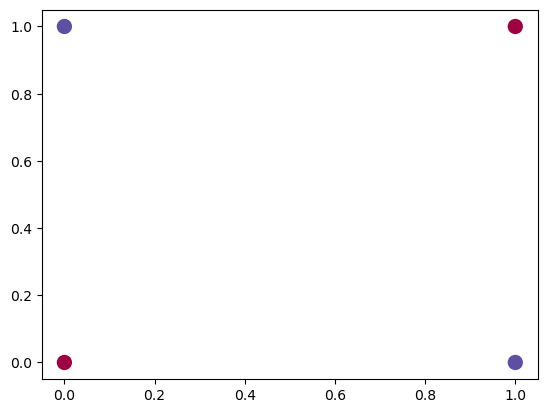

In [17]:
def plot_data(X, y, filename):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
        
def plot_decision_boundary(clf, X, y, filename):
    # Set min and max values and give it some padding
    #x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    #y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    X_out = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float))
    Z = X_out.data.max(1)[1]
    # Z.shape
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 1)
    plt.savefig(filename)
    plt.close()
    
data = pd.read_csv("XOR.csv") # UPDATE THE FILE NAME AND PATH TO MATCH YOUR REQUIREMENT
X = data.values[:, 0:2]  # Take only the first two features.     
X = torch.tensor(X, dtype = torch.float)   
y = data.values[:, 2]
y = torch.tensor(y, dtype = torch.long)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s = 100)



     

In [18]:
#%% train
net = Net()

# create a stochastic gradient descent optimizer
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)


# create a loss function
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

#nepochs = 600
nepochs = 5000
#10000
data, target = X, y


for epoch in range(nepochs):
#    adjust learning rate if desired
#    if epoch % 3000 == 0 and epoch <= 24000:
#        for g in optimizer.param_groups:
#            g['lr'] = g['lr']/2
    optimizer.zero_grad()
    # forward propagate
    net_out = net(data)
    # compute loss
    loss = criterion(net_out, target)
    
    # backpropagate
    loss.backward()
    # update parameters
    optimizer.step()
    # print out report
    
    if epoch % 10 == 0:
        print('Epoch ', epoch, 'Loss ', loss.item())
        if(loss.item()<0.0001):
            break
        net_out = net(data)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correctidx = pred.eq(target.data) 
        ncorrect = correctidx.sum()
        accuracy = ncorrect.item()/len(data)
        print('Training accuracy is ', accuracy)
        #if (accuracy==1):


C:\Users\aradh\AppData\Local\Temp\ipykernel_59588\507983196.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch  0 Loss  0.6971863508224487
Training accuracy is  0.5
Epoch  10 Loss  0.6886703372001648
Training accuracy is  0.75
Epoch  20 Loss  0.6704367399215698
Training accuracy is  0.75
Epoch  30 Loss  0.6011072993278503
Training accuracy is  0.75
Epoch  40 Loss  0.43836694955825806
Training accuracy is  1.0
Epoch  50 Loss  0.25278791785240173
Training accuracy is  1.0
Epoch  60 Loss  0.10162724554538727
Training accuracy is  1.0
Epoch  70 Loss  0.02773212268948555
Training accuracy is  1.0
Epoch  80 Loss  0.008036627434194088
Training accuracy is  1.0
Epoch  90 Loss  0.0033594490960240364
Training accuracy is  1.0
Epoch  100 Loss  0.0019726341124624014
Training accuracy is  1.0
Epoch  110 Loss  0.001395600731484592
Training accuracy is  1.0
Epoch  120 Loss  0.0010881959460675716
Training accuracy is  1.0
Epoch  130 Loss  0.0008862526738084853
Training accuracy is  1.0
Epoch  140 Loss  0.0007425008807331324
Training accuracy is  1.0
Epoch  150 Loss  0.0006310101598501205
Training accurac

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap=plt.cm.Spectral, s = 1)
plot_decision_boundary(net, X, y, 'P2_Q1_B.pdf')

C:\Users\aradh\AppData\Local\Temp\ipykernel_59588\507983196.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
